# QQQ Options Alpha - Exploratory Data Analysis

This notebook performs feature engineering and exploratory analysis of QQQ options data.

**Key Steps:**
1. Generate features from raw options data
2. Analyze feature distributions
3. Examine volatility regimes
4. Explore feature relationships


In [1]:
# Imports
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
from pathlib import Path

from feature_engineering import FeatureEngineer
from visualization import Visualizer, print_target_statistics, print_feature_groups, print_regime_distribution

# Initialize visualizer
viz = Visualizer()

print("✓ Imports loaded successfully")


✓ Imports loaded successfully


## 1. Generate Features

Run the robust feature engineering pipeline to create 100+ features from raw options data.


In [2]:
# Run feature engineering
fe = FeatureEngineer()
df = fe.run('../data/options_eod_QQQ.csv')

# Save features
output_path = Path('../data/daily_features.parquet')
df.to_parquet(output_path, index=False)
print(f"\n✓ Features saved to {output_path}")


ROBUST FEATURE ENGINEERING PIPELINE
Loading data from ../data/options_eod_QQQ.csv...
Loaded 5,061,315 rows
Date range: 2020-01-02 00:00:00 to 2025-09-18 00:00:00
Calculating implied volatility...
Building volatility surface features...
Aggregating features to daily level...
Adding rolling features...
Adding regime detection...
  High Vol periods: 613 days
  Low Vol periods: 823 days
Adding advanced features...
Creating target (forward 1 day return)...
Sanitizing data...
Data shape after sanitization: (1435, 100)
Features: 93
✓ Feature engineering complete!
  Total features: 93
  Date range: 2020-01-02 00:00:00 to 2025-09-17 00:00:00
  Total samples: 1435

✓ Features saved to ../data/daily_features.parquet


## 2. Feature Overview


In [3]:
# Display sample
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['tradeDate'].min().date()} to {df['tradeDate'].max().date()}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (1435, 100)
Date range: 2020-01-02 to 2025-09-17

First few rows:


,tradeDate,spotPrice,gex_call,gex_put,gex_atm,vega_call,vega_put,delta_call,delta_put,putVolume,...,vrp_x_skew,pcr_x_rvol,delta_flow_x_momentum,gex_x_rvol,gex_zscore,pcr_volume_zscore,vrp_zscore,vol_skew_monthly_zscore,spot_price_future,target
0,2020-01-02,215.62,1.141834e+09,6.552971e+08,5.976475e+08,345167.986510,437742.717004,9.639646e+05,3.207312e+06,399335,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,214.56,-0.004916
1,2020-01-03,214.56,1.115131e+09,1.015661e+09,2.519904e+08,346444.313613,477046.518127,9.087317e+05,3.251933e+06,485215,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.22,0.003076
2,2020-01-06,215.22,1.029933e+09,8.275029e+08,3.286407e+08,333081.449758,466632.471056,9.144958e+05,3.232321e+06,346873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,215.75,0.002463
3,2020-01-07,215.75,1.186570e+09,9.321295e+08,3.967080e+08,344648.463016,486721.472489,9.674616e+05,3.372004e+06,222857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,217.86,0.009780
4,2020-01-08,217.86,1.191207e+09,7.486364e+08,5.949740e+08,340980.416787,451027.346415,1.090601e+06,3.516401e+06,466914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,218.79,0.004269


In [4]:
# Print organized feature groups
feature_groups = print_feature_groups(df)



FEATURE GROUPS

Volatility Surface: 20 features
  First 5: ['iv_deep_otm_put_weekly', 'iv_otm_put_weekly', 'iv_atm_weekly', 'iv_otm_call_weekly', 'iv_deep_otm_call_weekly']
  Last 5: ['iv_deep_otm_put_long', 'iv_otm_put_long', 'iv_atm_long', 'iv_otm_call_long', 'iv_deep_otm_call_long']

GEX Features: 14 features
  First 5: ['gex_call', 'gex_put', 'gex_atm', 'gex_raw', 'gex_raw_clipped']
  Last 5: ['gex_ma_20d', 'gex_ma_60d', 'gex_x_momentum', 'gex_x_rvol', 'gex_zscore']

VRP Features: 3 features
  - vrp
  - vrp_x_skew
  - vrp_zscore

Skew Features: 4 features
  - vol_skew_monthly
  - vol_skew_deep
  - vrp_x_skew
  - vol_skew_monthly_zscore

PCR Features: 9 features
  - pcr_volume
  - pcr_oi
  - pcr_otm
  - pcr_volume_ma_5d
  - pcr_volume_ma_10d
  - pcr_volume_ma_20d
  - pcr_volume_ma_60d
  - pcr_x_rvol
  - pcr_volume_zscore

Momentum: 6 features
  - momentum_5d
  - momentum_10d
  - momentum_20d
  - momentum_60d
  - gex_x_momentum
  - delta_flow_x_momentum

Realized Vol: 4 features
  -

## 3. Target Analysis

Analyze the distribution and characteristics of next-day returns (our prediction target).


In [5]:
# Print statistics
print_target_statistics(df)



TARGET STATISTICS (Next-Day Returns)
count    1435.000000
mean        0.000829
std         0.015532
min        -0.078217
25%        -0.006483
50%         0.001342
75%         0.009411
max         0.125070
Name: target, dtype: float64

Annualized Return: 20.88%
Annualized Volatility: 24.66%
Sharpe Ratio (buy-and-hold): 0.85


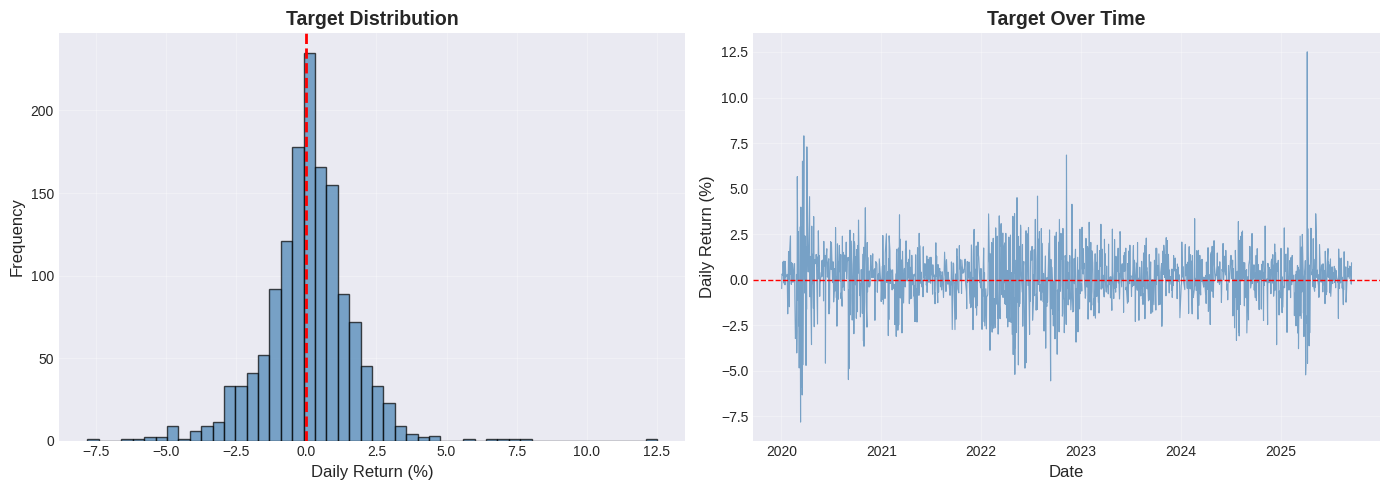

In [6]:
# Plot target distribution
viz.plot_target_distribution(df)


## 4. Volatility Regime Analysis

Our model includes regime detection to identify high/low volatility periods.


In [7]:
# Print regime distribution
print_regime_distribution(df)



VOLATILITY REGIME DISTRIBUTION
regime_label
Low Vol     822
High Vol    613
Name: count, dtype: int64

High Vol %: 42.7%
Low Vol %: 57.3%


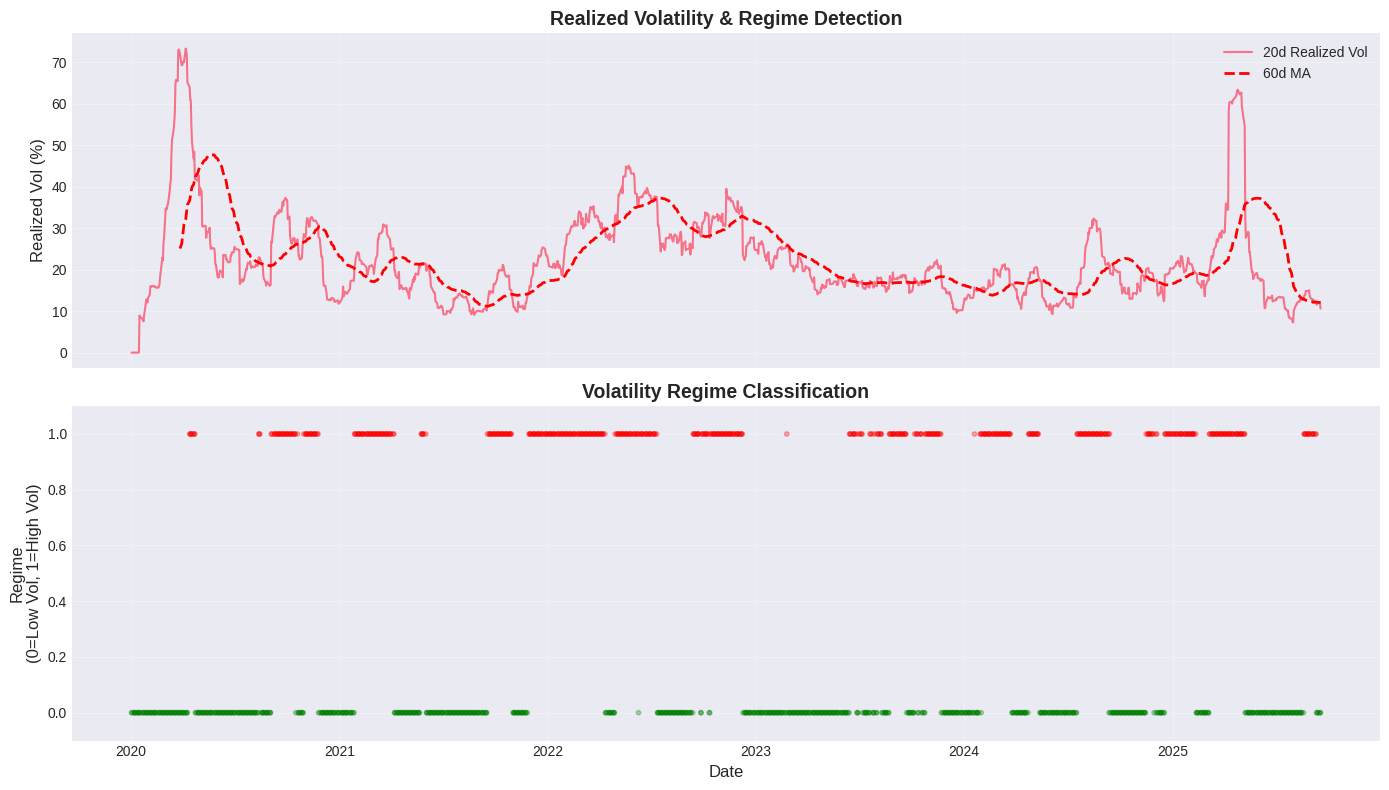

In [8]:
# Visualize regime detection
viz.plot_regime_detection(df)


## 5. Feature Correlations

Examine relationships between key features and the target.



CORRELATIONS WITH TARGET (Sorted)
target              1.000000
net_delta_flow      0.032056
pcr_volume          0.025138
rv_20d              0.021872
gex                 0.002208
momentum_20d       -0.010786
vrp                -0.011264
vol_skew_monthly   -0.017988
pcr_otm            -0.053489
Name: target, dtype: float64


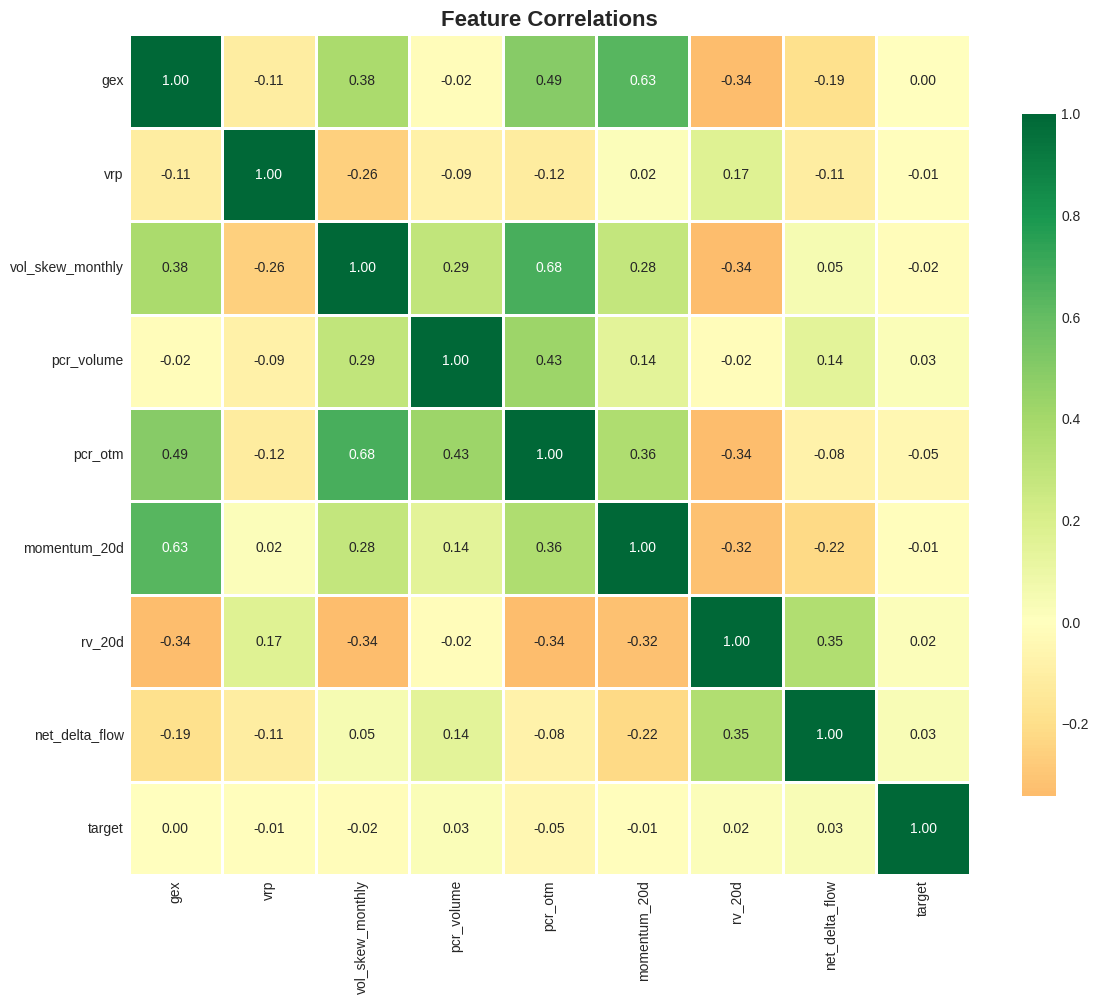

In [9]:
# Select key features for correlation analysis
key_features = [
    'gex', 'vrp', 'vol_skew_monthly', 'pcr_volume', 'pcr_otm',
    'momentum_20d', 'rv_20d', 'net_delta_flow', 'target'
]

# Plot correlation heatmap
fig, corr_matrix = viz.plot_feature_correlations(df, key_features)

# Print correlations with target
print("\n" + "=" * 80)
print("CORRELATIONS WITH TARGET (Sorted)")
print("=" * 80)
if 'target' in corr_matrix.columns:
    target_corr = corr_matrix['target'].sort_values(ascending=False)
    print(target_corr)


## 6. Key Feature Time Series

Visualize how key features evolve over time.


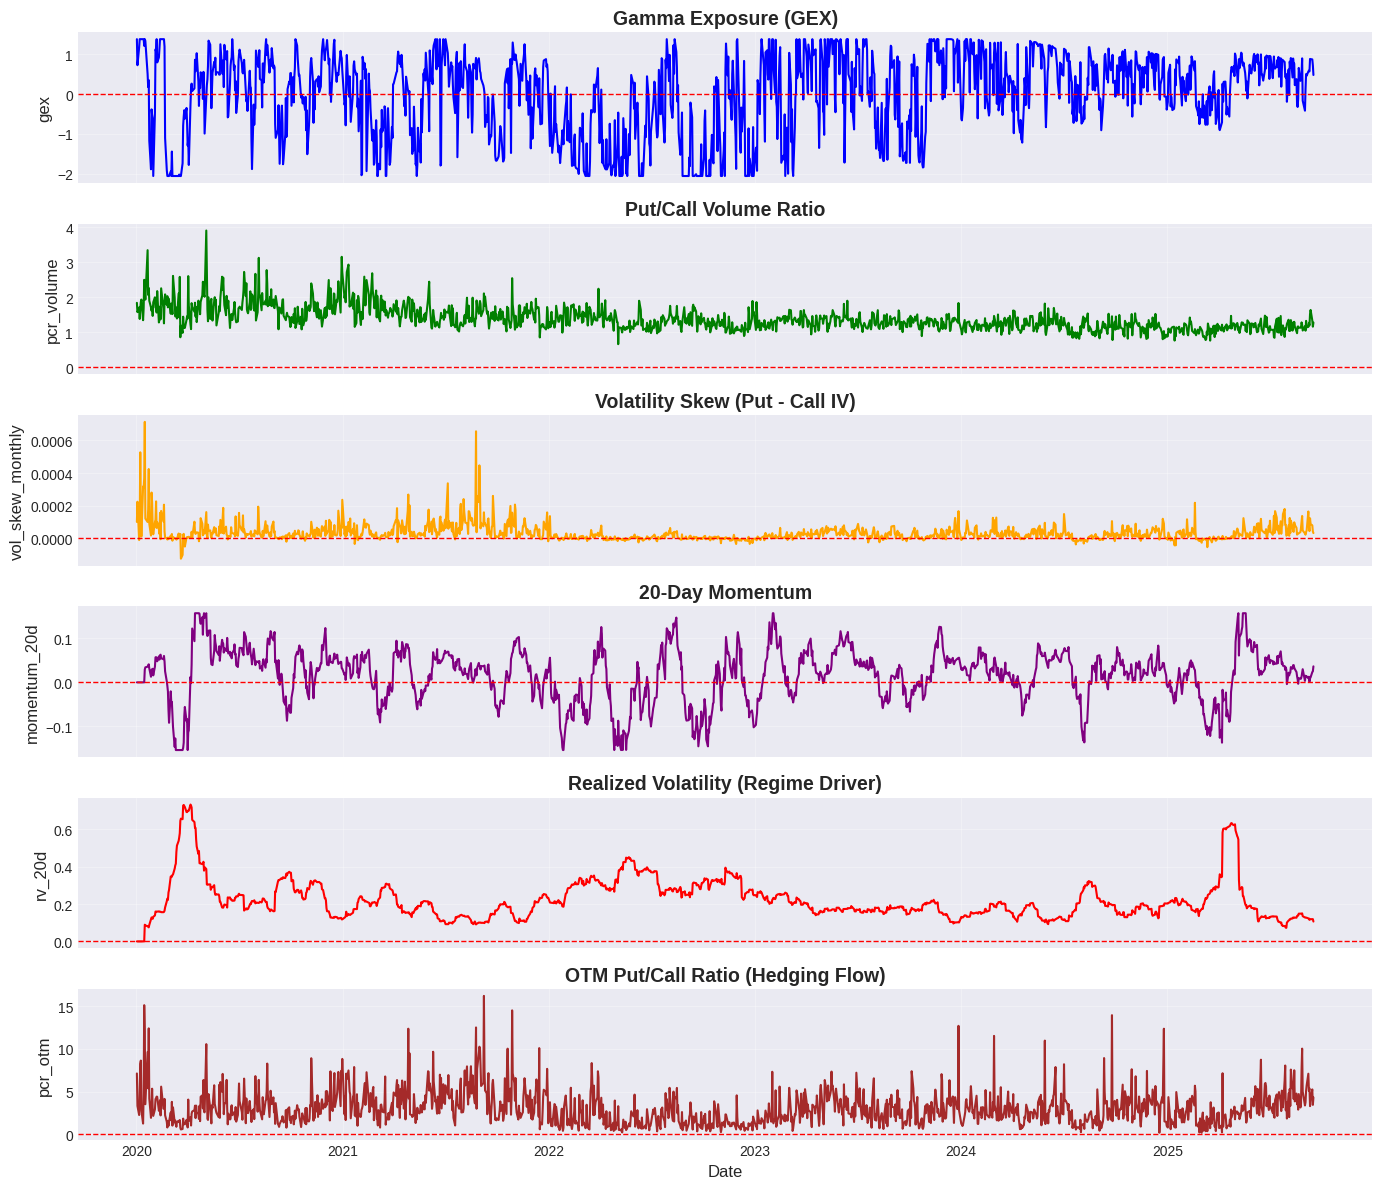

In [10]:
features_to_plot = {
    'gex': 'Gamma Exposure (GEX)',
    'pcr_volume': 'Put/Call Volume Ratio',
    'vol_skew_monthly': 'Volatility Skew (Put - Call IV)',
    'momentum_20d': '20-Day Momentum',
    'rv_20d': 'Realized Volatility (Regime Driver)',
    'pcr_otm': 'OTM Put/Call Ratio (Hedging Flow)'
}

viz.plot_feature_timeseries(df, features_to_plot)

## Summary

✓ Feature engineering complete with 100+ features  
✓ Regime detection identifies high/low volatility periods  
✓ Features saved to `data/daily_features.parquet`

**Next Step:** Run `model.ipynb` to train and evaluate the trading strategy.
